## Part A: Multi-Class Classification

Captchas were invented to prevent bots from attacking websites. But the ML models are breaking captchas. Thus, stronger captchas are being invented. In this part, we will train a ML model to break hcaptcha (https://www.hcaptcha.com/ )!!

Please download the following dataset: https://github.com/sarang-iitb/H-captcha-dataset

### 0. Load the dataset

In [1]:
# cloning
!git clone https://github.com/sarang-iitb/H-captcha-dataset

Cloning into 'H-captcha-dataset'...


In [2]:
import zipfile
def unzip_data(filename):
  """
  Unzips filename into the current working directory.

  Args:
    filename (str): a filepath to a target zip folder to be unzipped.
  """
  zip_ref = zipfile.ZipFile(filename, "r")
  zip_ref.extractall()
  zip_ref.close()

In [5]:
unzip_data('H-captcha-dataset/hcaptcha_dataset.zip')

### 1. Data Cleaning and Visualization

a) Check out the labels in the dataset. How many images belong to each class?

In [1]:
import os 
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import cv2 
# import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
train_path = r"hcaptcha_dataset/train/"
test_path  = r"hcaptcha_dataset/test/"
objects = ['airplane','bicycle','boat',
    'motorbus','motorcycle','seaplane','truck']

b) How many train and test images are present in your dataset? 

In [3]:

for i in objects:
    print(i)
    for j in range(2):
        if j==0:
            path = train_path+i
            l = len(os.listdir(path))
            print("train",l)
        else:
            path = test_path+i
            l = len(os.listdir(path))
            print("train",l)

    print()
            


airplane
train 402
train 101

bicycle
train 304
train 71

boat
train 527
train 134

motorbus
train 256
train 61

motorcycle
train 592
train 141

seaplane
train 280
train 75

truck
train 656
train 163



c) Write a function to display a random image and its shape. Find out whether
the shape of each image is the same or not. If not then make all images of the
same shape.

hcaptcha_dataset/test/motorcycle/1650254265804_2.jpg
(128, 128, 3)


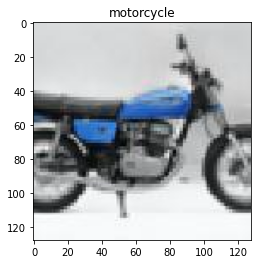

In [4]:
def rand(obj=objects,train_path =train_path,test_path = test_path):
    l = random.choice(['train','test'])
    if l == 'train':
        path = train_path
        g= random.choice(obj)
        r= random.choice(os.listdir(path+g))
        img = cv2.imread(path+g+'/'+r)
        print(path+g+'/'+r)
        dim = img.shape
        print(dim)
        plt.imshow(img)
        plt.title(g)
    else:
        path = test_path
        g= random.choice(obj)
        r= random.choice(os.listdir(path+g))
        img = cv2.imread(path+g+'/'+r)
        print(path+g+'/'+r)
        dim = img.shape
        print(dim)
        plt.imshow(img)
        plt.title(g)

r = rand()
        
    

In [4]:
#checking shape of every image
shape = [10000,10000]
for i in objects:
    print(i)
    for j in range(2):
        count1=0
        if j==0:
            path = train_path+i
            for k in os.listdir(path):
                try:
                    img = cv2.imread(path+'/'+k)
                    dim = img.shape
                    if dim != (128,128,3):
                        
                        count1+=1
                    shape[0] = min(shape[0],dim[0])
                    shape[1] = min(shape[1],dim[1])
                except:
                    os.remove(path+'/'+k)

        else:
            path = test_path+i
            for k in os.listdir(path):
                img = cv2.imread(path+'/'+k)
                dim = img.shape
                if dim != (128,128,3):
                    
                    count1+=1
                shape[0] = min(shape[0],dim[0])
                shape[1] = min(shape[1],dim[1])
        print(shape,count1)
#the minimum shape for each object was [128,128]
#count1 shows number of imgs having different shape than (128,128,3)
#just to be sure i will forcfully convert each img to (128,128) for no future 
shape = (128,128,3)
for i in objects:
    print(i)
    for j in range(2):
        count1=0
        if j==0:
            path = train_path+i
            for k in os.listdir(path):
                img = cv2.imread(path+'/'+k)
                dim = img.shape
                img = np.array(img)
                if dim != (128,128,3):
                    resized = cv2.resize(img, (128,128))
                    cv2.imwrite(path+'/'+k, resized)
                    count1+=1
                

        else:
            path = test_path+i
            for k in os.listdir(path):
                img = cv2.imread(path+'/'+k)
                dim = img.shape
                if dim != (128,128,3):
                    resized = cv2.resize(img, (128,128))
                    cv2.imwrite(path+'/'+k, resized)
                    count1+=1
        print(shape,count1)
           

airplane
[128, 128] 0
[128, 128] 0
bicycle
[128, 128] 0
[128, 128] 0
boat
[128, 128] 0
[128, 128] 0
motorbus
[128, 128] 0
[128, 128] 0
motorcycle
[128, 128] 0
[128, 128] 0
seaplane
[128, 128] 0
[128, 128] 0
truck
[128, 128] 0
[128, 128] 0
airplane
(128, 128, 3) 0
(128, 128, 3) 0
bicycle
(128, 128, 3) 0
(128, 128, 3) 0
boat
(128, 128, 3) 0
(128, 128, 3) 0
motorbus
(128, 128, 3) 0
(128, 128, 3) 0
motorcycle
(128, 128, 3) 0
(128, 128, 3) 0
seaplane
(128, 128, 3) 0
(128, 128, 3) 0
truck
(128, 128, 3) 0
(128, 128, 3) 0


d) Do you think removing color channels (R, G, B) from images would lead to
poor modeling? How can you justify converting each image to greyscale? What
will be the effect of using a colored 3-channel image over a grayscale one on the
classification model’s performance?

ANS: No, i do not think that removing the color channels and converting to greyscale will lead to any poor miodeling however the accuracy might decrease slightly but the efficiency of the algorithm will increase many folds. Grayscale of an image is just the intensity conversion of the image, we only need the descriptors of an image which can be extracted from grayscale as well. Hence to avoid complexity and computation inefficiency we convert the images to greyscale.

e) Should you normalize your color channel values? Based on your answers do
the steps you think will be best for your model.

Yes, we should normalize our color channels as sometimes the computation may be difficult on the large values, Hence we normalize.

In [6]:
# for i in objects:
#     print(i)
#     for j in range(2):
#         if j==0:
#             path = train_path+i
#             l = os.listdir(path)
#             for i in l:
#                 Id = path+i
#                 img = cv2.imread(Id,cv2.IMREAD_COLOR)
#                 out_img = np.zeros((800,800))
#                 normal_img = cv2.normalize(img,None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
#             print(normal_img)
#             #print("train",l)
#             #plt.imshow(normal_img)
#         else:
#             path = test_path+i
#             l = len(os.listdir(path))
#             #print("train",l)

#     print()
            


In [7]:
from copy import deepcopy

def pixel_mean_normalizer(img):
    img = deepcopy(img)
    h, w, *_ = img.shape
    for i in range(h):
        for j in range(w):
            img = img.astype('float32')
            img[i][j] = img[i][j] / (sum(img[i][j])+1)

    return img

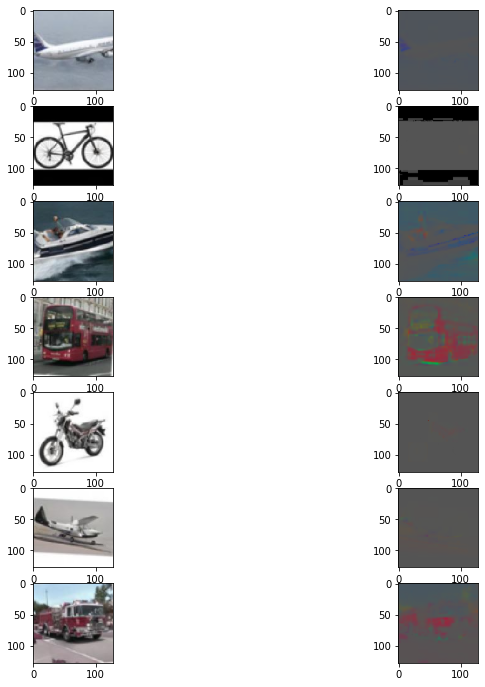

In [8]:
fig = plt.figure(figsize=(12,12))
path = train_path
r = 1
count = 1
for i in objects:
    plt.subplot(7,2,count)
    count+=1
    img_add = random.choice(os.listdir(path+i))
    img = cv2.imread(path+i+'/'+img_add)
    plt.imshow(img[:,:,::-1])
    plt.subplot(7,2,count)
    plt.imshow(pixel_mean_normalizer(img[:,:,::-1]))
    count+=1
    r+=1

we can see the mean normallizer was able to normalize the data

f) Visualize 3 random training images along with the labels for each class. The
dataset was manually labeled, do you spot any errors in the labels?

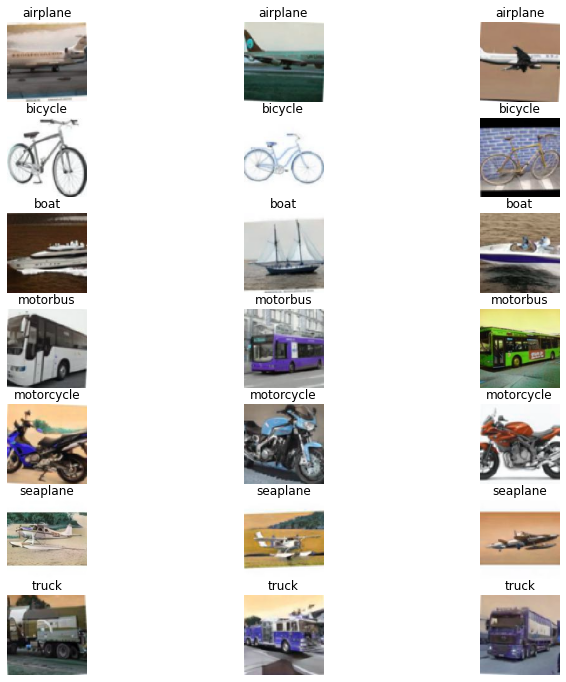

In [9]:
def randfor3(obj=objects,train_path =train_path,test_path = test_path):
    path = train_path
    fig = plt.figure(figsize=(12,12))
    count = 1
    for g in objects:
        for i in range(1,4):
            fig.add_subplot(7, 3, count)
            r= random.choice(os.listdir(path+g))
            img = cv2.imread(path+g+'/'+r)
            dim = img.shape
            
            # showing image
            plt.imshow(img)
            plt.axis('off')
            plt.title(g)
            count+=1

        


randfor3()

In [10]:
#no errors after several tries

no i could not find any errors as such in the labeling


### 2. Preparing Balanced Samples for Training using only the Training set provided to you.

a) Do you think if you apply cross-validation to the dataset then all the cross-validation folds will be similar? Why or why not?

NO, I DO NOT think that every fold will have similar measurements
because - 
1. there is a chance of getting photos of same object type into 
the training data .
2. there is a possibility that the train data is flooded with 
same or similar type of object, due to which other object 
validation will be quite low.
3. train data with equal proportion of all the class will 
have thhe best validation

b) What can you do to ensure that every fold contains images from each class and no duplicates? Do the needful on your dataset that will ensure similar crossvalidation folds.

to ensure that image from each class have all types of object and no duplicates, we will split each data label all the data in K parts simultaneously and store it in a list and for validation part we will combine the K-1 parts and test on the remaining 1. Since the imgs is already randomized in the dataset, we don't need to shuffle the data. 

we can create a similarity matrix and remove all the images which have similarity score more than 0.95 

In [5]:
lst_xtrain = []
lst_ytrain = []
lst_xtest = []
lst_ytest = []
x_TRAIN = []
y_TRAIN = []
x_TEST  = []
y_TEST = []
for i in objects:
    path = train_path+i
    lst = os.listdir(path)
    l = len(lst)
    sub = l//10
    count = 0
    temp = []
    temp2 = []
    var = 0
    for j in lst:
        img = cv2.imread(path+'/'+j)
        
        x_TRAIN.append(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY))
        y_TRAIN.append(i)
        temp.append(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY))
        temp2.append(i)
        count+=1
        
        if count==sub and i == 'airplane':
            lst_xtrain.append(temp)
            lst_ytrain.append(temp2)
            temp = []
            count =0
        elif count==sub and i!='airplane':
            lst_xtrain[var].extend(temp)
            lst_ytrain[var].extend(temp2)
            var+=1
            temp = []
            count =0
    path = test_path+i
    lst = os.listdir(path)
    l = len(lst)
    sub = l//10
    count = 0
    temp = []
    temp2 = []
    var = 0
    for j in lst:
        img = cv2.imread(path+'/'+j)
        temp.append(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY))
        temp2.append(i)
        count+=1
        x_TEST.append(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY))
        y_TEST.append(i)
        if count==sub and i == 'airplane':
            lst_xtest.append(temp)
            lst_ytest.append(temp2)
            temp = []
            count =0
        elif count==sub and i!='airplane':
            lst_xtest[var].extend(temp)
            lst_ytest[var].extend(temp2)
            var+=1
            temp = []
            count =0

print(len(lst_xtrain),len(lst_ytrain))
print(len(lst_xtest),len(lst_ytest))
print(len(x_TRAIN),len(x_TEST),len(y_TEST))


10 10
10 10
3017 746 746


### 3. Is Logistic regression a good algorithm for your dataset? Why or why not Based on the classification algorithms taught in class, which algorithms can be used to solve this problem?

ANS:
1.The output that is given by a Logistic Regression unit is in the range 0 to 1. To check for multiple classes we have to do for 1-vs- all or 1-vs-1 or soomething like that to classify.

2.it is a regression so it is mainly for continuous prediction rather than classification(though it will work as specified in pt.1 but other model may work better.

3. It is too simple to decipher the features from an image with just a single layer.

classification models is a good model for these kind of problems. models like KNN, SVM, CNN, etc could be used in these kind of questions for efficiency.

### 4. Train the KNN classifier algorithm on the training dataset. Don’t use the test set at this time. 

In [7]:
from sklearn.neighbors import KNeighborsClassifier
x_TRAIN = np.array(x_TRAIN)
nsamples, nx, ny = x_TRAIN.shape
d2_train = x_TRAIN.reshape((nsamples,nx*ny))
x_TEST = np.array(x_TEST)
nsamples, nx, ny = x_TEST.shape
d2_test = x_TEST.reshape((nsamples,nx*ny))



training = []
test = []
  
for k in range(2, 21):
    clf = KNeighborsClassifier(n_neighbors = k)
    clf.fit(d2_train, y_TRAIN)
  
    training_score = clf.score(d2_train, y_TRAIN)
  
    training.append(training_score)
    print(k,':',[training_score])


# for keys, values in scores.items():
#     print(keys, ':', values)

2 : [0.8462048392442824]
3 : [0.8495193901226383]
4 : [0.8180311567782566]
5 : [0.8130593304607225]
6 : [0.7938349353662578]
7 : [0.7882001988730527]
8 : [0.777262180974478]
9 : [0.7659927079880676]
10 : [0.7533974146503148]
11 : [0.7543917799138217]
12 : [0.7404706662247266]
13 : [0.7398077560490554]
14 : [0.7341730195558502]
15 : [0.7292011932383162]
16 : [0.7258866423599603]
17 : [0.7255551872721246]
18 : [0.7215777262180975]
19 : [0.7156115346370567]
20 : [0.7129598939343719]


both training and testing score decrease with increase in k values

a) What distance/similarity function should we use for comparing images?
Compare at least 3 different metrics on a few random samples to get some
understanding of how they work.

In [14]:
#( |X1 – Y1|p + |X2 – Y2|p + |X2 – Y2|p )^1/p minskowski system
clf = KNeighborsClassifier(n_neighbors = 3,metric = 'minkowski')
clf.fit(d2_train, y_TRAIN)
training_score = clf.score(d2_train, y_TRAIN)
print([training_score])
# Cos(x, y) = x . y / ||x|| * ||y|| x cosine distance
clf2 = KNeighborsClassifier(n_neighbors = 3,metric = 'cosine')
clf2.fit(d2_train, y_TRAIN)
training_score = clf2.score(d2_train, y_TRAIN)
print([training_score])


[0.8495193901226383]
[0.8153795160755718]


b) What is the impact of increasing K on the speed and accuracy of the
algorithm? 

both training and testing score decrease with increase in k values.And talking about the speed, the speed doesnot get affect that much by k value as in the end the algo has to compare distance from all the point.

c) Choose a good value of K and the distance metric based on cross-validation.

based on above accuracy the optimal k value might be 3. lets validate it using cross validation

In [15]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf,d2_train, y_TRAIN, cv=7)
print(scores)
#for cv = 10
#[0.68211921 0.70198675 0.74503311 0.6986755  0.74172185 0.74503311 0.7218543  0.72425249 0.71096346 0.73421927]
#[0.6986755  0.72019868 0.72802653 0.70315091 0.71641791]
#for cv= 5
#[0.66821346 0.74709977 0.72389791 0.7424594  0.72389791 0.70533643 0.7424594 ]
scores = cross_val_score(clf2,d2_train, y_TRAIN, cv=7)
print(scores)

[0.66821346 0.74709977 0.72389791 0.7424594  0.72389791 0.70533643
 0.7424594 ]
[0.65661253 0.69605568 0.69141531 0.68445476 0.7099768  0.6612529
 0.69605568]


therefore our best model for KNN is clf with 3 neighbours and minkowski distance as the calculator

### 5. Train SVM classifiers on the dataset. Don’t use the test set at this time.

In [8]:
from sklearn import svm
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( d2_train, y_TRAIN, test_size=0.33, random_state=42)

In [16]:

CLf = svm.SVC(kernel = 'linear')
CLf.fit(X_train,y_train)
y_pred = CLf.predict(X_test)
print('linear',accuracy_score(y_test,y_pred))

CLf2 = svm.SVC(kernel = 'rbf')
CLf2.fit(X_train,y_train)
y_pred = CLf2.predict(X_test)
print('rbf',accuracy_score(y_test,y_pred))

CLf3 = svm.SVC(kernel = 'sigmoid')
CLf3.fit(X_train,y_train)
y_pred = CLf3.predict(X_test)
print('sigmoid',accuracy_score(y_test,y_pred))

linear 0.7379518072289156
rbf 0.8303212851405622
sigmoid 0.20381526104417672


In [17]:
# CLf3 = svm.SVC(kernel = 'sigmoid')
# CLf3.fit(X_train,y_train)
# y_pred = CLf3.predict(X_test)
# print(accuracy_score(y_test,y_pred))

a) Which kernel functions can be used for this dataset? Why?

ANS:
we could use any non linear kernels which works good on multi-dim arrays, linear is used for linear data classification , Rbf is a very good option as it help to classify non linear boundaries.

b) Which of the SVM implementations (SVC, SGDClassifier, NuSVC and LinearSVC)
is the best for this dataset? Why?


In [9]:
from sklearn import svm
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
CLf = svm.SVC(kernel =  'rbf',probability = True)
CLf.fit(X_train,y_train)
y_pred = CLf.predict(X_test)
print(accuracy_score(y_test,y_pred))

# CLf2 = svm.SGDClassifier(kernel = 'rbf')
# CLf2.fit(X_train,y_train)
# y_pred = CLf2.predict(X_test)
# print(accuracy_score(y_test,y_pred))

CLf3 = svm.NuSVC(kernel =  'rbf')
CLf3.fit(X_train,y_train)
y_pred = CLf3.predict(X_test)
print(accuracy_score(y_test,y_pred))
# CLf3 = svm.LinearSVC()
# CLf3.fit(X_train,y_train)
# y_pred = CLf3.predict(X_test)
# print(accuracy_score(y_test,y_pred))
#it got a accuracyy of 0.67... hence ignored

0.8303212851405622
0.7600401606425703


therefore our SVC is the best classifier with rbf kernel. named 'CLf'


c) Finalize your SVM model based on cross-validation


In [47]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(CLf,d2_train, y_TRAIN, cv=7)
print(scores)
#for cv = 10
#[0.68211921 0.70198675 0.74503311 0.6986755  0.74172185 0.74503311 0.7218543  0.72425249 0.71096346 0.73421927]
#[0.6986755  0.72019868 0.72802653 0.70315091 0.71641791]
#for cv= 5
#[0.66821346 0.74709977 0.72389791 0.7424594  0.72389791 0.70533643 0.7424594 ]

[0.80974478 0.83526682 0.86542923 0.87238979 0.83990719 0.84686775
 0.85846868]


the CLf classifier is performing better in all the subset of the data.

### 6. Evaluate and compare the classification models on the test set provided to you

a) Calculate the classification accuracy of both the models and compare

In [11]:
nsamples, nx, ny = x_TEST.shape
testing = x_TEST.reshape((nsamples,nx*ny))


In [22]:

y_pred_1 = clf.predict(testing)
print("KNN : ",accuracy_score(y_TEST,y_pred_1))
y_pred_2 = CLf.predict(testing)
print("SVC : ",accuracy_score(y_TEST,y_pred_2))

KNN :  0.7453083109919572
SVC :  0.8592493297587132


b) Which are the two classes that were most confused by your model? What
classification evaluation metric can be used to best visualize it? Plot the
visualization for both models

In [42]:
from sklearn.metrics import classification_report
print('for SVM')
print(classification_report(y_TEST,y_pred_2))
print('for KNN')
print(classification_report(y_TEST,y_pred_1))

for SVM
              precision    recall  f1-score   support

    airplane       0.83      0.85      0.84       101
     bicycle       0.96      0.90      0.93        71
        boat       0.86      0.89      0.88       134
    motorbus       0.79      0.38      0.51        61
  motorcycle       0.94      0.92      0.93       141
    seaplane       1.00      0.96      0.98        75
       truck       0.74      0.90      0.81       163

    accuracy                           0.86       746
   macro avg       0.87      0.83      0.84       746
weighted avg       0.86      0.86      0.85       746

for KNN
              precision    recall  f1-score   support

    airplane       0.51      0.82      0.63       101
     bicycle       0.87      0.77      0.82        71
        boat       0.67      0.87      0.76       134
    motorbus       0.55      0.18      0.27        61
  motorcycle       0.94      0.70      0.80       141
    seaplane       0.87      0.95      0.90        75
       t

In [46]:
def metric(predictions,y_TEST = y_TEST):
        confuse = dict()
        for i in objects:
                confuse[i] = dict()
                for j in objects:
                        confuse[i][j] = 0

        for i in range(len(y_pred_2)):
                confuse[y_TEST[i]][predictions[i]]+=1
        col = ['name','airplane','bicycle','boat','motorbus','motorcycle','seaplane','truck']
        calc_df = pd.DataFrame(columns = col)
        calc_df['name'] = objects
        for i in objects:
                for j in range(len(objects)):
                        calc_df[i][j] = confuse[i][objects[j]]

        print(calc_df.head(8))
print("KNN")
metric(y_pred_1)
print("SVM")
metric(y_pred_2)
#each row  represents how the corresponding row object was classified
#like airplane was called bicycle 4 times, boat 9 times and so on.

KNN
         name airplane bicycle boat motorbus motorcycle seaplane truck
0    airplane       83      13   12       18         16        3    17
1     bicycle        0      55    2        2          1        0     3
2        boat       16       3  116       14          6        1    16
3    motorbus        0       0    2       11          3        0     4
4  motorcycle        0       0    0        4         99        0     2
5    seaplane        1       0    0        0         10       71     0
6       truck        1       0    2       12          6        0   121
SVM
         name airplane bicycle boat motorbus motorcycle seaplane truck
0    airplane       86       4    9        0          1        0     4
1     bicycle        0      64    0        1          0        0     2
2        boat       11       2  119        2          0        2     2
3    motorbus        0       0    0       23          1        0     5
4  motorcycle        0       0    0        4        130        1     

c:\Users\siddh\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


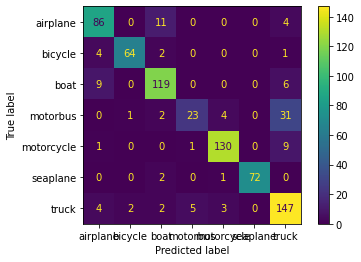

In [12]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(CLf, testing, y_TEST)

from the look of the above matric the SVM-model was most confused between truck and motorbus and then airplane and seaplane

c) Do you think you can maximize both Precision and Recall for a model? What
do you think will be a better metric to judge a model? 

no we can not maximize both, there is a trade-off between the prescion and recall, if recall increase, prescision decrease.
I think recall might be a better judging parameter for the models 
as recall refers to the percentage of total relevant results correctly classified by our algorithm.
we can also use the ROC/AUC curve as AUC defines how much is the overlap of true negative and true positive for a given class and ROC is the curve of probability of correctness. 

d) A bridge in Raipur is unstable and we want to avoid fatalities. Trucks and
Buses should be stopped while motorbikes and bicycles can be allowed. Which
of your 2 models do you think will be better for this task? Explain with the help of
Precision/Recall, ROC curve and AUC.

ANS:
we should aim to minimize ki fake positive because we need to correctly classify large size vehicles to small size vehicles. according to the above ROC curve we can see that in the second graph(SVM) the false positives ar mininize up to a much larger extend then in the first model(KNN). Though we have to maintain the tradeoff between prescision and recall. So, we have to choose model with high prescision value.



In [53]:
from sklearn.metrics import roc_auc_score
print('ROC/AUC score for KNN')
print(roc_auc_score(y_TEST, clf.predict_proba(testing), multi_class='ovr'))
print('ROC/AUC score for SVM')
print(roc_auc_score(y_TEST, CLf.predict_proba(testing), multi_class='ovr'))

ROC/AUC score for KNN
0.9100397035865989
ROC/AUC score for SVM
0.9749063581198734


c:\Users\siddh\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)
c:\Users\siddh\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

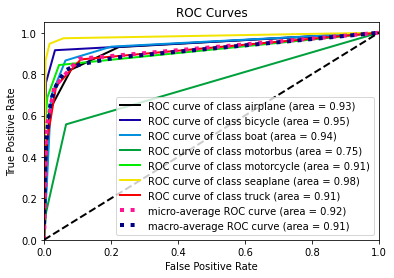

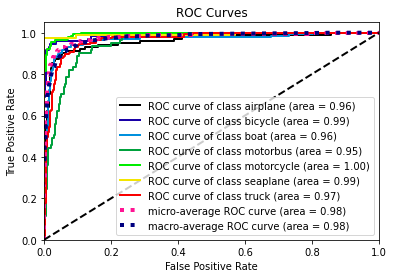

In [60]:
import scikitplot as skplt
import matplotlib.pyplot as plt


skplt.metrics.plot_roc_curve(y_TEST,clf.predict_proba(testing))
skplt.metrics.plot_roc_curve(y_TEST,CLf.predict_proba(testing))

e) Find the Micro and Macro F1 Score of both of your models and comment on
which is better and why.


In [65]:
#caclulate confusion matrix for all classes

from sklearn.metrics import multilabel_confusion_matrix
conf  = multilabel_confusion_matrix(y_TEST,y_pred_2)
print(conf)

[[[627  18]
  [ 15  86]]

 [[672   3]
  [  7  64]]

 [[593  19]
  [ 15 119]]

 [[679   6]
  [ 38  23]]

 [[597   8]
  [ 11 130]]

 [[671   0]
  [  3  72]]

 [[532  51]
  [ 16 147]]]


In [69]:
f1_score = []
total_TP = 0
total_FP = 0
total_FN = 0
for i in conf:
    total_TP+=i[0][0]
    total_FP+=i[0][1]
    total_FN+=i[1][0]
    temp = i[0][0]/(i[0][0]+1/2*(i[0][1]+i[1][0]))
    f1_score.append(temp)
print('F1_scores for each class:')
print(f1_score)
macro_f1 = sum(f1_score)/7
print("macro f1 score is:",macro_f1)
totol_TP = 0
micro_f1 = total_TP/(total_TP+1/2*(total_FP+total_FN))
print("micro f1 score is:",micro_f1)

F1_scores for each class:
[0.9743589743589743, 0.9926144756277696, 0.9721311475409836, 0.9686162624821684, 0.9843363561417972, 0.9977695167286246, 0.9407603890362511]
macro f1 score is: 0.9757981602737955
micro f1 score is: 0.9765415549597856


we should use the macro f1 score as it treats all classes equally as all classes are equally important for the training.

### 7. Write a function to create a random 3x3 captcha matrix and ask the user to label the class with maximum number of examples. Estimate how often your best model will be able to solve the captcha problem correctly.


In [73]:
c1 = 0

['bicycle', 'seaplane', 'bicycle', 'boat', 'airplane', 'bicycle', 'bicycle', 'truck', 'airplane']


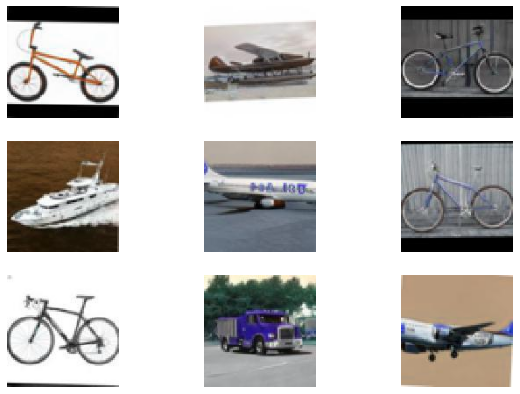

In [81]:
def randfor3(obj=objects,train_path =train_path,test_path = test_path):
    path = train_path
    fig = plt.figure(figsize=(10, 7))
    lab = []
    img_set = []
    for i in range(1,10):
        fig.add_subplot(3, 3, i)
        g= random.choice(obj)
        r= random.choice(os.listdir(path+g))
        img = cv2.imread(path+g+'/'+r)
        dim = img.shape
        img_set.append(cv2.cvtColor(img,cv2.COLOR_BGR2GRAY))
        # showing image
        plt.imshow(img)
        plt.axis('off')
        lab.append(g)
    return lab,img_set


labels,img_set = randfor3()
img_set = np.array(img_set)
nsamples, nx, ny = img_set.shape
predictions = list(clf.predict(img_set.reshape((nsamples,nx*ny))))
print(predictions)
max_count_labels = ['',0]
d = dict()
for i in predictions:
    try:
        d[i]+=1
        if d[i]>max_count_labels[1]:
            max_count_labels[1] = d[i]
            max_count_labels[0] = i
            
    except:
        d[i] = 1
guess_labels = []
for i in d.keys():
    if d[i]==max_count_labels[1]:
        guess_labels.append(i)


In [82]:

user_in = input("give the label of the object appearing the max number of times: ")
if user_in.lower() in guess_labels:
    print("access granted")
    c1+=0
else:
    print("access denied, the label with max count is ",max_count_labels,' of ',guess_labels)

access granted


we estimate that around 80% of the time the model is classifying correctly.
we ran the above 2 cells for about 10 times and it was able to grant access 8 time.

## Part B: Ensemble Models

You started a Car Selling business and you are giving recommendations to people for buying cars.

We have provided a dataset to help you start your business.


Dataset: https://github.com/sarang-iitb/Car_Condition_evaluation_dataset


Now, your job is to train a robust model and we will test how good you are on the test set. 

In [ ]:
# get the dataset
!wget 'paste_link_here'

### Data Preparation: Perform necessary transformations on the input dataset to prepare it for ML model training.

In [35]:
from sklearn.preprocessing import LabelEncoder
df = pd.read_csv("train_data.csv")

In [38]:
df.head()
df = df.apply(LabelEncoder().fit_transform)


In [39]:
df.head()


,Buying_Cost,Maintainance_Cost,Number_of_doors,Number_of_Passenger,Luggage_Space,Safety_Features,How_is_the_deal
0,3,2,0,1,2,1,0
1,3,2,3,1,2,1,0
2,2,3,3,1,2,1,0
3,0,0,1,0,1,2,0
4,3,3,3,1,2,2,0


In [30]:
df.isnull().sum()

Buying_Cost            0
Maintainance_Cost      0
Number_of_doors        0
Number_of_Passenger    0
Luggage_Space          0
Safety_Features        0
How_is_the_deal        0
dtype: int64

In [40]:
df_train = df.drop('How_is_the_deal',axis=1)
df_y = df["How_is_the_deal"]
X_train, X_test, y_train, y_test = train_test_split( df_train, df_y, test_size=0.33, random_state=42)


### Ensemble Model: Train any ensemble model of your choice combining your favorite models. In particular, we would like you to try both bagging and boosting.
* Bag of models of your choice
* Adaboost or XGBoost


In [93]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier



In [96]:
clf = AdaBoostClassifier(n_estimators = 500, random_state = 42)
clf.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=500, random_state=42)

In [97]:
clf.score(X_test,y_test)

0.9941520467836257

In [49]:
clf = BaggingClassifier(n_estimators = 500,random_state = 0)
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.9922027290448343